# Zomato Data Analysis
Analyzed a dataset of 9,500+ Zomato restaurants using Python, Pandas, and Seaborn. Performed data cleaning, exploratory data analysis, statistical tests, clustering, and created professional visualizations.

## Key Features
- Cleaned data: Handled missing values, duplicates, and type conversions.
- EDA: Analyzed ratings, costs, cuisines, and geographic trends.
- Advanced Analysis: Conducted T-tests and K-means clustering.
- Visualizations: Generated static (Matplotlib/Seaborn) and interactive (Plotly) plots.

## Files
- `zomato_final.csv`: Final dataset with clusters.
- `enhanced_*.png`: Polished visualizations.
- `interactive_rating_vs_cost.html`: Interactive Plotly plot.
- `Zomato_Analysis.ipynb`: Full code.

## Tools
- Python, Pandas, Seaborn, Plotly, Scikit-learn
- Google Colab

Zomato Data Analysis Project
- Analyzed 9,500+ restaurant records using Python, Pandas, and Seaborn, performing data cleaning, statistical tests, and K-means clustering.
- Created professional visualizations (bar charts, scatter plots, interactive plots) and prepared data for Power BI dashboards.
- Documented findings in a GitHub portfolio, showcasing end-to-end data analysis skills.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/My\ Drive/Projects/zomato_restaurants.csv .

In [ ]:
import os
print(os.listdir())

['.config', 'drive', 'zomato_restaurants.csv', 'sample_data']


#Importing Dataset

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('zomato_restaurants.csv')
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9552 entries, 0 to 9551
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9552 non-null   object 
 1   Restaurant ID         9552 non-null   object 
 2   Restaurant Name       9552 non-null   object 
 3   Country Name          9552 non-null   object 
 4   Country Code          9552 non-null   float64
 5   City                  9552 non-null   object 
 6   Address               9552 non-null   object 
 7   Locality              9551 non-null   object 
 8   Locality Verbose      9551 non-null   object 
 9   Longitude             9551 non-null   object 
 10  Latitude              9551 non-null   object 
 11  Cuisines              9542 non-null   object 
 12  Average Cost for two  9551 non-null   float64
 13  Currency              9551 non-null   object 
 14  Has Table booking     9551 non-null   object 
 15  Has Onl

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0               0
Restaurant ID            0
Restaurant Name          0
Country Name             0
Country Code             0
City                     0
Address                  0
Locality                 1
Locality Verbose         1
Longitude                1
Latitude                 1
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     2
Price range              2
Aggregate rating         2
Rating color             2
Rating text              2
Votes                    2
dtype: int64


In [ ]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

#Checking Data Types before Applying Analysis

In [ ]:
print("Data Types Before Conversion:")
print(df.dtypes)
print("\nSample Latitude Values:")
print(df['Latitude'].head())
print("\nSample Longitude Values:")
print(df['Longitude'].head())

Data Types Before Conversion:
Restaurant ID            object
Restaurant Name          object
Country Name             object
Country Code            float64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                 object
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object

Sample Latitude Values:
0    14.565443
1    14.553708
2    14.581404
3    14.585318
4     14.58445
Name: Latitude, dtype: object

Sample Longitude Values:
0    121.027535
1    121.014101
2    121.056831
3    121.056475
4    121.057508
Name: Longitude,

In [ ]:
# Drop Unnamed: 0
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Drop rows with missing Locality or Locality Verbose
df = df.dropna(subset=['Locality', 'Locality Verbose'])

# Convert Latitude and Longitude to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Impute numerical columns
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())
df['Average Cost for two'] = df['Average Cost for two'].fillna(df['Average Cost for two'].median())
df['Aggregate rating'] = df['Aggregate rating'].fillna(df['Aggregate rating'].median())
df['Votes'] = df['Votes'].fillna(df['Votes'].median())
df['Price range'] = df['Price range'].fillna(df['Price range'].median())

# Fill categorical columns
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df['Currency'] = df['Currency'].fillna(df['Currency'].mode()[0])
df['Has Table booking'] = df['Has Table booking'].fillna('No')
df['Has Online delivery'] = df['Has Online delivery'].fillna('No')
df['Is delivering now'] = df['Is delivering now'].fillna('No')
df['Switch to order menu'] = df['Switch to order menu'].fillna('No')
df['Rating color'] = df['Rating color'].fillna('Unknown')
df['Rating text'] = df['Rating text'].fillna('Unknown')

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print("\nData Types After Conversion:")
print(df.dtypes)


Missing Values After Cleaning:
Restaurant ID           0
Restaurant Name         0
Country Name            0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Data Types After Conversion:
Restaurant ID            object
Restaurant Name          object
Country Name             object
Country Code            float64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
A

#Remove Duplicates

In [ ]:
# Remove duplicates
print(f"\nDuplicates Before: {df.duplicated(subset=['Restaurant ID', 'Address']).sum()}")
df = df.drop_duplicates(subset=['Restaurant ID', 'Address'])
print(f"Rows After Dropping Duplicates: {len(df)}")

# Rename columns
df = df.rename(columns={
    'Average Cost for two': 'cost_for_two',
    'Has Table booking': 'table_booking',
    'Has Online delivery': 'online_delivery',
    'Is delivering now': 'delivering_now',
    'Aggregate rating': 'rating',
    'Switch to order menu': 'order_menu'
})

# Convert to boolean
df['table_booking'] = df['table_booking'].map({'Yes': True, 'No': False})
df['online_delivery'] = df['online_delivery'].map({'Yes': True, 'No': False})
df['delivering_now'] = df['delivering_now'].map({'Yes': True, 'No': False})
df['order_menu'] = df['order_menu'].map({'Yes': True, 'No': False})

# Save cleaned dataset
df.to_csv('zomato_cleaned.csv', index=False)
print("Cleaned dataset saved as 'zomato_cleaned.csv'")
from google.colab import files
files.download('zomato_cleaned.csv')


Duplicates Before: 0
Rows After Dropping Duplicates: 9551
Cleaned dataset saved as 'zomato_cleaned.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Summary statistics

In [ ]:
print("\nSummary Statistics:")
print(df.describe())

# Service features
print("\nTable Booking:")
print(df['table_booking'].value_counts())
print("\nOnline Delivery:")
print(df['online_delivery'].value_counts())
print("\nDelivering Now:")
print(df['delivering_now'].value_counts())

# Average rating and cost
avg_rating = df['rating'].mean()
avg_cost = df['cost_for_two'].mean()
print(f"\nAverage Rating: {avg_rating:.2f}")
print(f"Average Cost for Two: {avg_cost:.2f}")

# Rating distribution
rating_counts = df['rating'].value_counts().sort_index()
print("\nRating Distribution:")
print(rating_counts)

# Top countries and cities
top_countries = df['Country Name'].value_counts().head(5)
top_cities = df['City'].value_counts().head(5)
print("\nTop 5 Countries:")
print(top_countries)
print("\nTop 5 Cities:")
print(top_cities)


Summary Statistics:
       Country Code    Longitude     Latitude   cost_for_two  Price range  \
count   9551.000000  9551.000000  9551.000000    9551.000000  9551.000000   
mean      18.346486    64.123784    25.857237    1199.201235     1.804628   
std       56.725496    41.465282    11.005100   16121.183753     0.905332   
min        1.000000  -157.948486   -41.330428       0.000000     1.000000   
25%        1.000000    77.081343    28.478747     250.000000     1.000000   
50%        1.000000    77.191960    28.570470     400.000000     2.000000   
75%        1.000000    77.281958    28.642758     700.000000     2.000000   
max      216.000000   174.832089    55.976980  800000.000000     4.000000   

            rating         Votes  
count  9551.000000   9551.000000  
mean      2.666370    156.909852  
std       1.516378    430.169115  
min       0.000000      0.000000  
25%       2.500000      5.000000  
50%       3.200000     31.000000  
75%       3.700000    131.000000  
max  

#Creating Graph by using Matplotlib

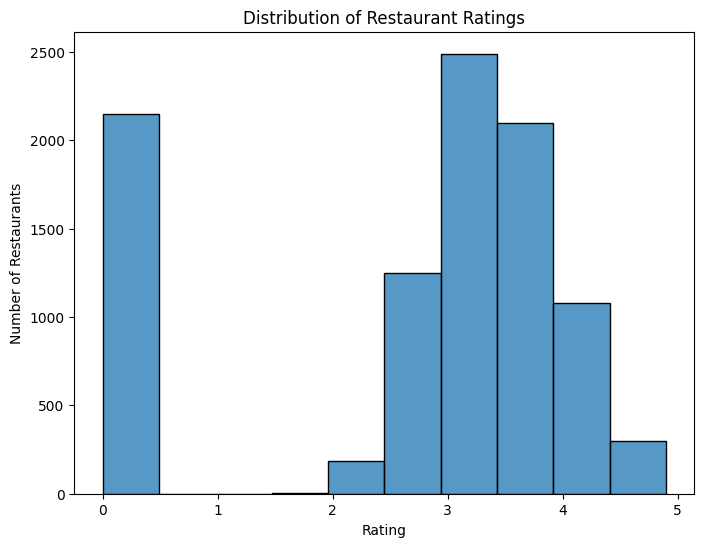

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

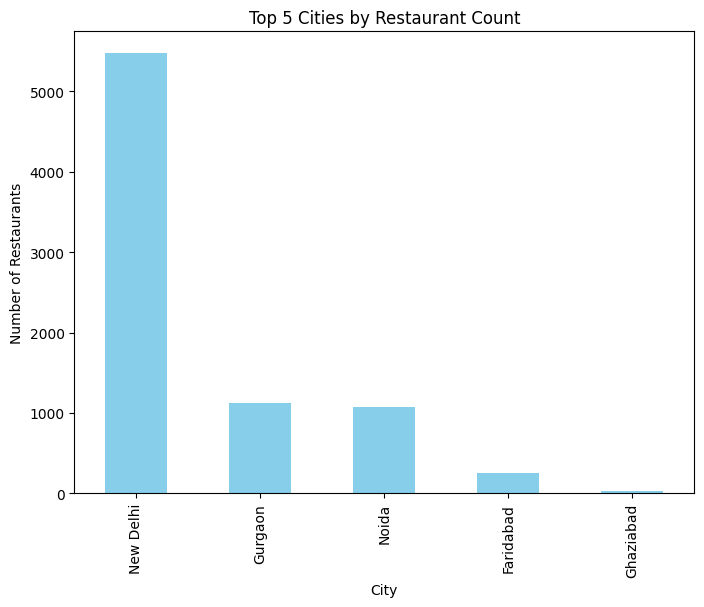

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=10, kde=False)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.savefig('rating_distribution.png')
plt.show()
from google.colab import files
files.download('rating_distribution.png')

# Bar chart of top 5 cities
plt.figure(figsize=(8, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cities by Restaurant Count')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.savefig('top_cities.png')
plt.show()
files.download('top_cities.png')

In [ ]:
with open('eda_summary.txt', 'w') as f:
    f.write(f"Total Restaurants: {len(df)}\n")
    f.write(f"Average Rating: {avg_rating:.2f}\n")
    f.write(f"Average Cost for Two: {avg_cost:.2f}\n")
    f.write("\nTable Booking:\n")
    f.write(str(df['table_booking'].value_counts()) + '\n')
    f.write("\nOnline Delivery:\n")
    f.write(str(df['online_delivery'].value_counts()) + '\n')
    f.write("\nDelivering Now:\n")
    f.write(str(df['delivering_now'].value_counts()) + '\n')
    f.write("\nRating Distribution:\n")
    f.write(str(rating_counts) + '\n')
    f.write("\nTop 5 Countries:\n")
    f.write(str(top_countries) + '\n')
    f.write("\nTop 5 Cities:\n")
    f.write(str(top_cities) + '\n')
print("EDA summary saved as 'eda_summary.txt'")
from google.colab import files
files.download('eda_summary.txt')

EDA summary saved as 'eda_summary.txt'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv('zomato_cleaned.csv')
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant ID     9551 non-null   object 
 1   Restaurant Name   9551 non-null   object 
 2   Country Name      9551 non-null   object 
 3   Country Code      9551 non-null   float64
 4   City              9551 non-null   object 
 5   Address           9551 non-null   object 
 6   Locality          9551 non-null   object 
 7   Locality Verbose  9551 non-null   object 
 8   Longitude         9551 non-null   float64
 9   Latitude          9551 non-null   float64
 10  Cuisines          9551 non-null   object 
 11  cost_for_two      9551 non-null   float64
 12  Currency          9551 non-null   object 
 13  table_booking     0 non-null      float64
 14  online_delivery   0 non-null      float64
 15  delivering_now    0 non-null      float64
 16  order_menu        0 non-null

In [ ]:
# Split and count cuisines
df['Cuisines'] = df['Cuisines'].str.split(', ')
all_cuisines = df['Cuisines'].explode().str.strip()
cuisine_counts = all_cuisines.value_counts().head(10)
print("\nTop 10 Cuisines:")
print(cuisine_counts)

# Cuisines by country (top 5 countries)
top_countries = df['Country Name'].value_counts().head(5).index
for country in top_countries:
    country_cuisines = df[df['Country Name'] == country]['Cuisines'].explode().str.strip()
    print(f"\nTop 5 Cuisines in {country}:")
    print(country_cuisines.value_counts().head(5))


Top 10 Cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

Top 5 Cuisines in India:
Cuisines
North Indian    3946
Chinese         2690
Fast Food       1963
Mughlai          992
Bakery           726
Name: count, dtype: int64

Top 5 Cuisines in United States:
Cuisines
American    112
Seafood      59
Burger       49
Sandwich     49
Pizza        49
Name: count, dtype: int64

Top 5 Cuisines in United Kingdom:
Cuisines
Indian      17
Cafe        12
British     12
American    11
Italian      9
Name: count, dtype: int64

Top 5 Cuisines in Brazil:
Cuisines
Brazilian    26
Bar Food      9
Italian       6
Pizza         4
Grill         4
Name: count, dtype: int64

Top 5 Cuisines in UAE:
Cuisines
Indian          25
American        11
Chinese          9
North Indian     9
Burger           7
Name: c

In [ ]:
# Rating vs. cost_for_two
print("\nCorrelation between Rating and Cost for Two:")
print(df[['rating', 'cost_for_two']].corr())

# Average rating by service features
print("\nAverage Rating by Table Booking:")
print(df.groupby('table_booking')['rating'].mean())
print("\nAverage Rating by Online Delivery:")
print(df.groupby('online_delivery')['rating'].mean())

# Rating by price range
print("\nAverage Rating by Price Range:")
print(df.groupby('Price range')['rating'].mean())


Correlation between Rating and Cost for Two:
                rating  cost_for_two
rating        1.000000      0.051792
cost_for_two  0.051792      1.000000

Average Rating by Table Booking:
Series([], Name: rating, dtype: float64)

Average Rating by Online Delivery:
Series([], Name: rating, dtype: float64)

Average Rating by Price Range:
Price range
1.0    1.999887
2.0    2.941137
3.0    3.683381
4.0    3.818974
Name: rating, dtype: float64


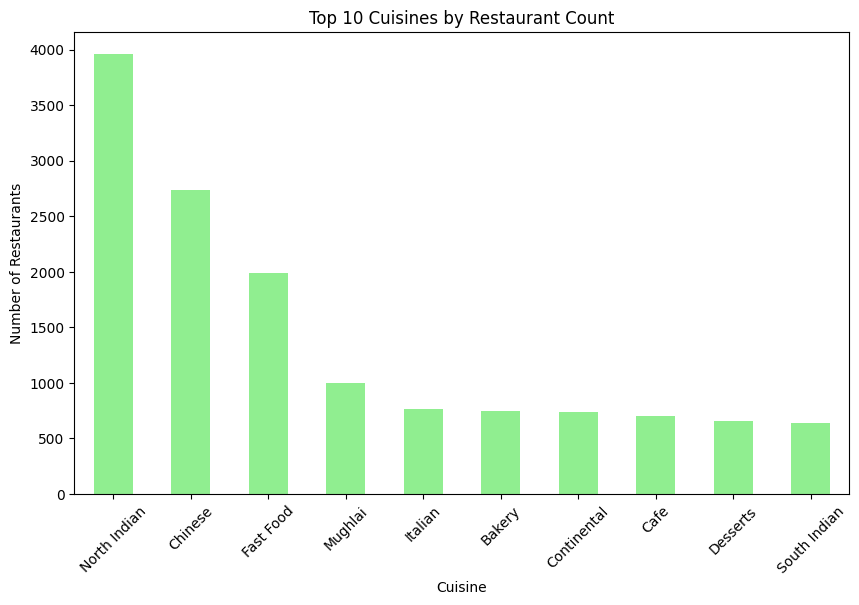

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

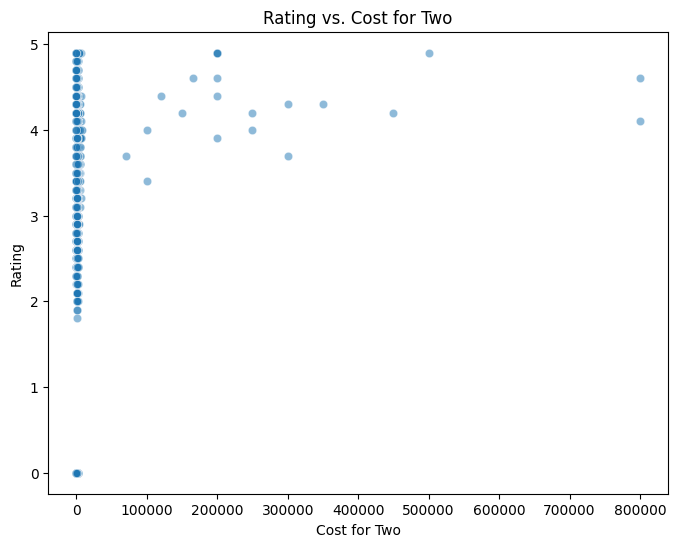

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

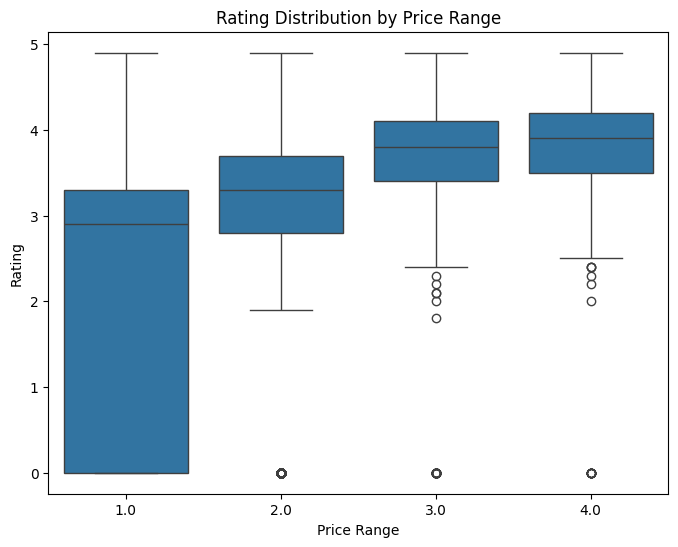

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 cuisines bar chart
plt.figure(figsize=(10, 6))
cuisine_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cuisines by Restaurant Count')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.savefig('top_cuisines.png')
plt.show()
from google.colab import files
files.download('top_cuisines.png')

# Rating vs. cost scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost_for_two', y='rating', data=df, alpha=0.5)
plt.title('Rating vs. Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.savefig('rating_vs_cost.png')
plt.show()
files.download('rating_vs_cost.png')

# Rating by price range box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price range', y='rating', data=df)
plt.title('Rating Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.savefig('rating_by_price_range.png')
plt.show()
files.download('rating_by_price_range.png')

In [ ]:
with open('day2_summary.txt', 'w') as f:
    f.write(f"Day 2 Analysis Summary\n")
    f.write(f"Total Restaurants: {len(df)}\n")
    f.write("\nTop 10 Cuisines:\n")
    f.write(str(cuisine_counts) + '\n')
    f.write("\nCorrelation between Rating and Cost for Two:\n")
    f.write(str(df[['rating', 'cost_for_two']].corr()) + '\n')
    f.write("\nAverage Rating by Table Booking:\n")
    f.write(str(df.groupby('table_booking')['rating'].mean()) + '\n')
    f.write("\nAverage Rating by Online Delivery:\n")
    f.write(str(df.groupby('online_delivery')['rating'].mean()) + '\n')
    f.write("\nAverage Rating by Price Range:\n")
    f.write(str(df.groupby('Price range')['rating'].mean()) + '\n')
print("Day 2 summary saved as 'day2_summary.txt'")
from google.colab import files
files.download('day2_summary.txt')

Day 2 summary saved as 'day2_summary.txt'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Day 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If df is not in memory, load zomato_cleaned.csv
try:
    print("Checking in-memory DataFrame:")
    print(df.info())
except NameError:
    print("Loading zomato_cleaned.csv")
    df = pd.read_csv('zomato_cleaned.csv')
    print("Dataset Info:")
    print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())
print("\nFirst 5 Rows:")
print(df.head())

# Set Seaborn style for better visuals
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

Checking in-memory DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant ID     9551 non-null   object 
 1   Restaurant Name   9551 non-null   object 
 2   Country Name      9551 non-null   object 
 3   Country Code      9551 non-null   float64
 4   City              9551 non-null   object 
 5   Address           9551 non-null   object 
 6   Locality          9551 non-null   object 
 7   Locality Verbose  9551 non-null   object 
 8   Longitude         9551 non-null   float64
 9   Latitude          9551 non-null   float64
 10  Cuisines          9551 non-null   object 
 11  cost_for_two      9551 non-null   float64
 12  Currency          9551 non-null   object 
 13  table_booking     0 non-null      float64
 14  online_delivery   0 non-null      float64
 15  delivering_now    0 non-null      float64
 16  order_menu  

In [ ]:
print("\nCuisines Column Type:")
print(df['Cuisines'].dtype)
print("\nSample Cuisines Values:")
print(df['Cuisines'].head())
print("\nSample Cuisines Type (first row):")
print(type(df['Cuisines'].iloc[0]))


Cuisines Column Type:
object

Sample Cuisines Values:
0          [French, Japanese, Desserts]
1                            [Japanese]
2    [Seafood, Asian, Filipino, Indian]
3                     [Japanese, Sushi]
4                    [Japanese, Korean]
Name: Cuisines, dtype: object

Sample Cuisines Type (first row):
<class 'list'>


In [ ]:
# Enhanced Top 10 Cuisines Bar Chart
all_cuisines = df['Cuisines'].explode().str.strip()  # No str.split needed
cuisine_counts = all_cuisines.value_counts().head(10)


<ipython-input-33-ea05da532916>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='viridis')


Checking in-memory DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant ID     9551 non-null   object 
 1   Restaurant Name   9551 non-null   object 
 2   Country Name      9551 non-null   object 
 3   Country Code      9551 non-null   float64
 4   City              9551 non-null   object 
 5   Address           9551 non-null   object 
 6   Locality          9551 non-null   object 
 7   Locality Verbose  9551 non-null   object 
 8   Longitude         9551 non-null   float64
 9   Latitude          9551 non-null   float64
 10  Cuisines          9551 non-null   object 
 11  cost_for_two      9551 non-null   float64
 12  Currency          9551 non-null   object 
 13  table_booking     0 non-null      float64
 14  online_delivery   0 non-null      float64
 15  delivering_now    0 non-null      float64
 16  order_menu  

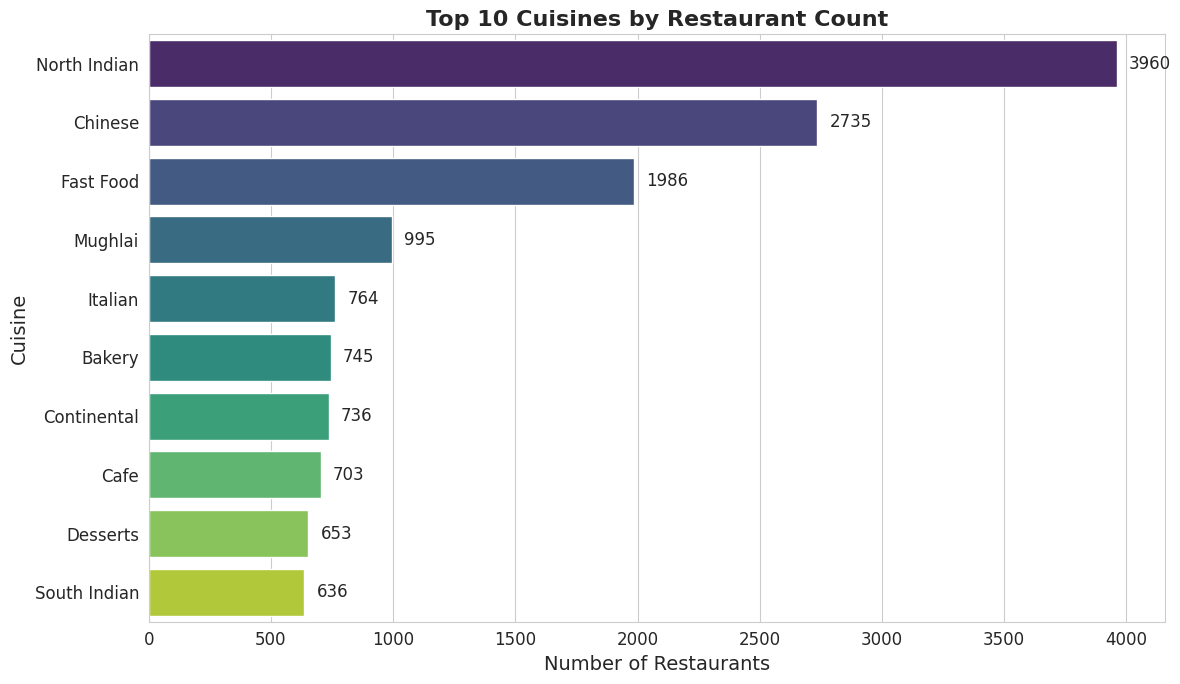

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

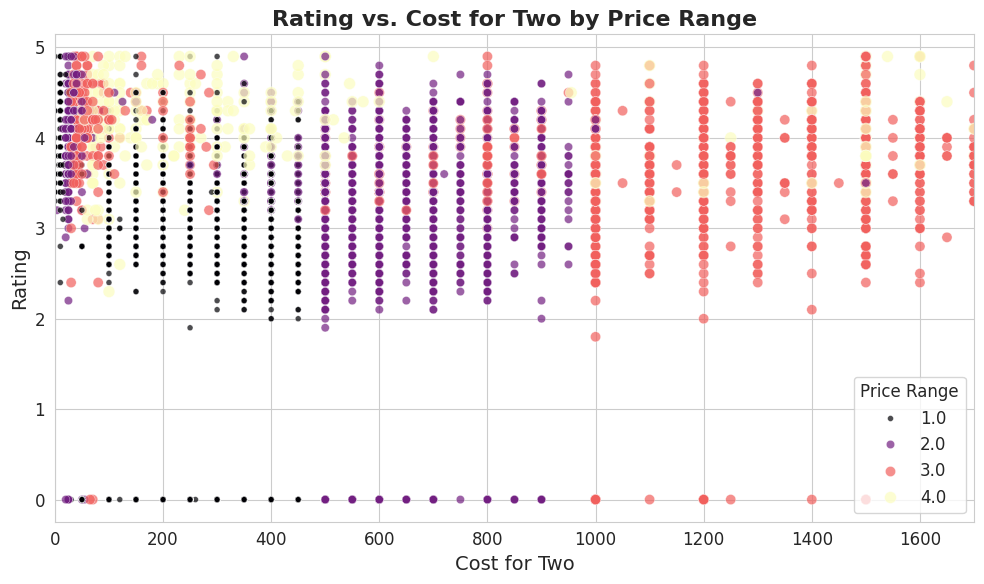

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-33-ea05da532916>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='rating', data=df, palette='coolwarm')


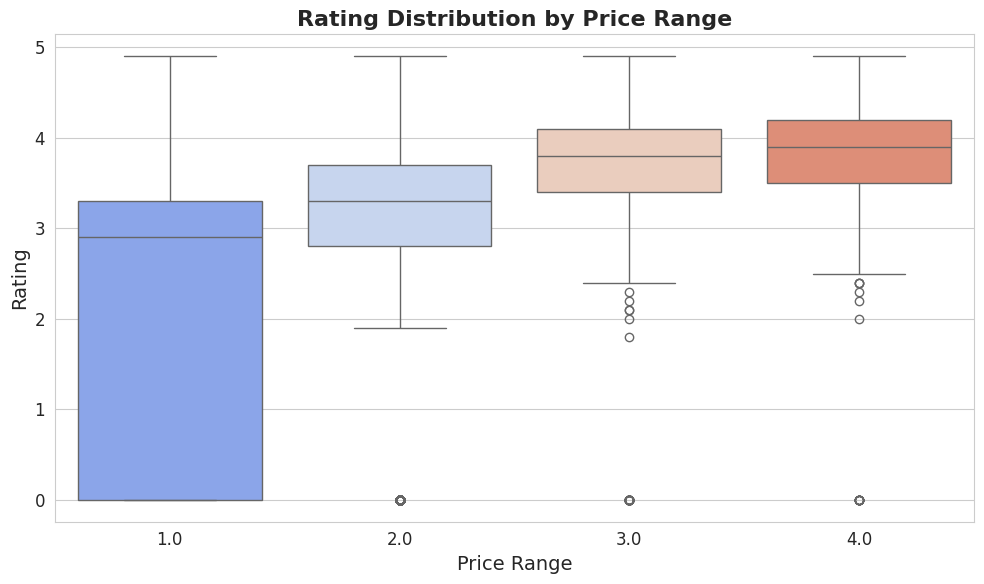

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-33-ea05da532916>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_ratings.values, y=country_ratings.index, palette='plasma')


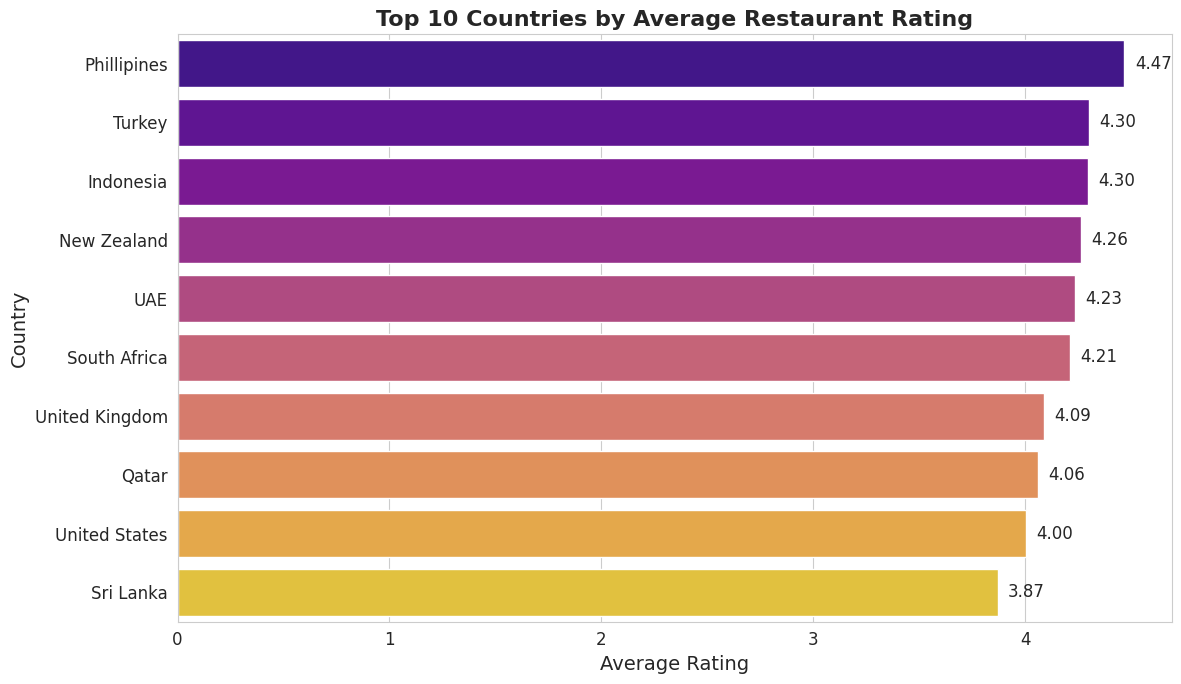

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)



T-Test: Rating by Online Delivery
T-Statistic: nan, P-Value: nan
No significant difference

Cluster Counts:
Cluster
0    7388
2    2148
1      15
Name: count, dtype: int64

Cluster Characteristics:
           rating   cost_for_two
Cluster                         
0        3.438089     747.499459
1        4.393333  346666.666667
2        0.000000     340.337523
Final dataset saved as 'zomato_final.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Country summary saved as 'country_summary.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Day 3 summary saved as 'day3_summary.txt'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Portfolio Outputs:
- zomato_final.csv
- country_summary.csv
- enhanced_top_cuisines.png
- enhanced_rating_vs_cost.png
- enhanced_rating_by_price_range.png
- country_ratings.png
- day3_summary.txt
Manually save these to Google Drive and upload to GitHub


In [ ]:
# Step 2: Enhance Visualizations
# Top 10 Cuisines Bar Chart
all_cuisines = df['Cuisines'].explode().str.strip()
cuisine_counts = all_cuisines.value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='viridis')
plt.title('Top 10 Cuisines by Restaurant Count', fontsize=16, weight='bold')
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('Cuisine', fontsize=14)
for i, v in enumerate(cuisine_counts.values):
    plt.text(v + 50, i, str(v), va='center', fontsize=12)
plt.tight_layout()
plt.savefig('enhanced_top_cuisines.png', dpi=300)
plt.show()
from google.colab import files
files.download('enhanced_top_cuisines.png')

# Rating vs. Cost Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_for_two', y='rating', data=df, hue='Price range', size='Price range', palette='magma', alpha=0.7)
plt.title('Rating vs. Cost for Two by Price Range', fontsize=16, weight='bold')
plt.xlabel('Cost for Two', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xlim(0, df['cost_for_two'].quantile(0.95))  # Limit outliers
plt.legend(title='Price Range', fontsize=12)
plt.tight_layout()
plt.savefig('enhanced_rating_vs_cost.png', dpi=300)
plt.show()
files.download('enhanced_rating_vs_cost.png')

# Rating by Price Range Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='rating', data=df, palette='coolwarm')
plt.title('Rating Distribution by Price Range', fontsize=16, weight='bold')
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.savefig('enhanced_rating_by_price_range.png', dpi=300)
plt.show()
files.download('enhanced_rating_by_price_range.png')

# Country Ratings Bar Chart
country_ratings = df.groupby('Country Name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=country_ratings.values, y=country_ratings.index, palette='plasma')
plt.title('Top 10 Countries by Average Restaurant Rating', fontsize=16, weight='bold')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Country', fontsize=14)
for i, v in enumerate(country_ratings.values):
    plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=12)
plt.tight_layout()
plt.savefig('country_ratings.png', dpi=300)
plt.show()
files.download('country_ratings.png')

# Step 3: Advanced Analysis
from scipy.stats import ttest_ind
online = df[df['online_delivery'] == True]['rating']
no_online = df[df['online_delivery'] == False]['rating']
t_stat, p_value = ttest_ind(online, no_online, equal_var=False)
print("\nT-Test: Rating by Online Delivery")
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in ratings between restaurants with and without online delivery")
else:
    print("No significant difference")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = df[['rating', 'cost_for_two']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
print("\nCluster Counts:")
print(df['Cluster'].value_counts())
print("\nCluster Characteristics:")
print(df.groupby('Cluster')[['rating', 'cost_for_two']].mean())

# Step 4: Prepare for Power BI/Excel
df.to_csv('zomato_final.csv', index=False)
print("Final dataset saved as 'zomato_final.csv'")
files.download('zomato_final.csv')

summary_data = pd.DataFrame({
    'Country': country_ratings.index,
    'Average Rating': country_ratings.values,
    'Restaurant Count': df['Country Name'].value_counts().reindex(country_ratings.index).values
})
summary_data.to_csv('country_summary.csv', index=False)
print("Country summary saved as 'country_summary.csv'")
files.download('country_summary.csv')

with open('day3_summary.txt', 'w') as f:
    f.write("Day 3 Analysis Summary\n")
    f.write(f"Total Restaurants: {len(df)}\n")
    f.write("\nTop 10 Countries by Average Rating:\n")
    f.write(str(country_ratings) + '\n')
    f.write("\nT-Test: Rating by Online Delivery\n")
    f.write(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}\n")
    f.write("\nCluster Counts:\n")
    f.write(str(df['Cluster'].value_counts()) + '\n')
    f.write("\nCluster Characteristics:\n")
    f.write(str(df.groupby('Cluster')[['rating', 'cost_for_two']].mean()) + '\n')
print("Day 3 summary saved as 'day3_summary.txt'")
files.download('day3_summary.txt')


In [ ]:
# Export cluster summary
cluster_summary = df.groupby('Cluster')[['rating', 'cost_for_two', 'Price range']].mean()
cluster_summary.to_csv('cluster_summary.csv')
files.download('cluster_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)
for _, row in df.head(100).iterrows():  # Limit for performance
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)
m.save('restaurant_map.html')
files.download('restaurant_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
from google.colab import files

fig = px.scatter(df, x='cost_for_two', y='rating', color='Price range', size='Price range', hover_data=['Restaurant Name'])
fig.update_layout(title='Rating vs. Cost for Two', xaxis_title='Cost for Two', yaxis_title='Rating')
fig.write_html('interactive_rating_vs_cost.html')
files.download('interactive_rating_vs_cost.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>